# MLS 3: Data Pre-Processing

*During this mentored learning session, we will be utilizing a brain stroke dataset and covering three notebooks, each focused on a specific concept* 

*In the first notebook, "brain_stroke_pre-processing.ipynb", we will perform data pre-processing to clean and transform the unclean data, followed by exploratory data analysis. Data pre-processing involves several steps, such as removing duplicates, handling missing values, scaling, and transforming the data to ensure that it is accurate, complete, and ready for analysis*

*The second notebook, "processing_test.ipynb", will demonstrate a simple processing job*

*In the third notebook, "brain_stroke-processing_job.ipynb", we will convert our "brain_stroke_pre-processing.ipynb" notebook, which performed data pre-processing, into a processing job. A processing job involves using machine learning algorithms to process data through a series of steps, transforming raw data into a suitable format for analysis. Processing jobs can be run on various computing platforms, ranging from local machines to cloud-based services, depending on factors such as data set size, processing job complexity, and available computing resources*

The dataset (brain_stroke.csv) contains information about patients who have had a stroke, and includes the following columns:

* Gender: Indicates the gender of the patient.
* Age: Indicates the age of the patient.
* Hypertension: Indicates whether the patient has hypertension (high blood pressure) or not.
* Heart disease: Indicates whether the patient has a heart disease or not.
* Ever married: Indicates whether the patient is currently married or not.
* Work type: Indicates the type of work the patient does.
* Residence type: Indicates whether the patient lives in an urban or rural area.
* Smoking status: Indicates the smoking status of the patient.
* Stroke: Indicates whether the patient has had a stroke or not.
* Is paralyzed: Indicates whether the patient is paralyzed or not.
* Avg glucose level: Indicates the average glucose level in the patient's blood.
* BMI: Indicates the body mass index (BMI) of the patient.

*To begin the data pre-processing, it is essential to install the required libraries and packages manually.*

### Getting setup with Libraries

In [1]:
pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 38.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 2.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Import necessary packages

In [4]:
# Packages to manipulate data
import numpy as np
import pandas as pd

* NumPy (short for Numerical Python) is a library used for working with arrays and matrices in Python. It provides a wide range of mathematical functions for performing operations on arrays and matrices, such as calculating mean, median, standard deviation, etc.

* Pandas is a library used for data manipulation and analysis in Python. It provides data structures for efficiently storing and manipulating large datasets, such as the DataFrame and Series objects. With Pandas, we can perform a wide range of operations on data, including filtering, sorting, grouping, and merging.

In [5]:
# Packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


* Matplotlib is a plotting library in Python that provides a wide range of tools for creating various types of plots, such as line plots, scatter plots, bar plots, histograms, etc.

* Seaborn is a data visualization library that is built on top of Matplotlib. Seaborn provides higher-level functions for creating statistical visualizations that are aesthetically pleasing and informative.

In [6]:
# Packages for data pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

* LabelEncoder and StandardScaler are classes from the sklearn.preprocessing module of the Scikit-learn library. LabelEncoder is used for encoding categorical features as numeric values, and StandardScaler is used for scaling features to have zero mean and unit variance. 

* train_test_split is a function from the sklearn.model_selection module of Scikit-learn. This function is used to split the dataset into training and testing subsets, which can be used for model training and evaluation, respectively.

* variance_inflation_factor is a function from the statsmodels.stats.outliers_influence module of the Statsmodels library. This function is used to calculate the variance inflation factor (VIF) for each feature in a dataset, which is used to detect multicollinearity (high correlation) among features.

* SMOTE is a class from the imblearn.over_sampling module of the imbalanced-learn library. SMOTE stands for Synthetic Minority Over-sampling Technique, and it is a popular method for oversampling the minority class in imbalanced datasets. It generates synthetic samples for the minority class by interpolating between the existing samples.

### How to read the dataset

*Create a Data folder and upload the data file ("brain_stroke.csv") in it.*

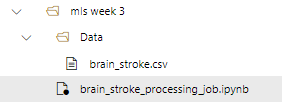

In [9]:
from IPython import display
display.Image("Image/Image2.png")

Reading the data from the data folder:

In [8]:
df=pd.read_csv("data/brain_stroke.csv")

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,is_paralyzed,avg_glucose_level_bmi
0,Male,NaN,0,1,Yes,Private,Urban,formerly smoked,1,1,228.69;36.6
1,Male,80.0,0,1,Yes,Private,Rural,never smoked,1,1,105.92;32.5
2,Female,NaN,0,0,Yes,Private,Urban,smokes,1,1,171.23;34.4
3,Female,79.0,1,0,Yes,Self-employed,Rural,never smoked,1,1,174.12;24
4,Male,NaN,0,0,Yes,Private,Urban,formerly smoked,1,1,186.21;29


### Data Cleaning

#### Handle missing values

In [10]:
# Check for missing values
df.isnull().sum()

gender                   0
age                      5
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
smoking_status           0
stroke                   0
is_paralyzed             0
avg_glucose_level_bmi    0
dtype: int64

In [11]:
# Handle missing values in age by imputing with mean
df['age'].fillna(df['age'].mean(), inplace = True)

In [12]:
# Check for missing categories
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [13]:
# Remove rows with "Unknown" smoking status
df = df[df['smoking_status']!='Unknown']

#### Manage Vector Features

In [14]:
# Show the vector feature
df.avg_glucose_level_bmi.head()

0    228.69;36.6
1    105.92;32.5
2    171.23;34.4
3      174.12;24
4      186.21;29
Name: avg_glucose_level_bmi, dtype: object

In [15]:
# Apply lamba function to split the vector into 2 parts
df['avg_glucose_level'] = df['avg_glucose_level_bmi'].apply(lambda x:x.split(';')[0])
df['bmi'] = df['avg_glucose_level_bmi'].apply(lambda x:x.split(';')[1])

* This code splits a single column in a Pandas DataFrame, df['avg_glucose_level_bmi'], into two separate columns, df['avg_glucose_level'] and df['bmi'].

* The first line of code creates a new column called avg_glucose_level by applying the split() method to each value in the avg_glucose_level_bmi column, which is assumed to be a string in the format of "avg_glucose_level;bmi". The apply() method is used to apply the split() method to each value in the avg_glucose_level_bmi column. The lambda function is used to define the operation to be applied to each value, which in this case is to split the value by the semicolon delimiter (';') and return the first value. The resulting value is then assigned to the new avg_glucose_level column.

* The second line of code creates a new column called bmi using a similar approach, but returns the second value from the split string, which corresponds to the bmi value in the original avg_glucose_level_bmi column.

In [16]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,is_paralyzed,avg_glucose_level_bmi,avg_glucose_level,bmi
0,Male,43.412263,0,1,Yes,Private,Urban,formerly smoked,1,1,228.69;36.6,228.69,36.6
1,Male,80.000000,0,1,Yes,Private,Rural,never smoked,1,1,105.92;32.5,105.92,32.5
2,Female,43.412263,0,0,Yes,Private,Urban,smokes,1,1,171.23;34.4,171.23,34.4
3,Female,79.000000,1,0,Yes,Self-employed,Rural,never smoked,1,1,174.12;24,174.12,24
4,Male,43.412263,0,0,Yes,Private,Urban,formerly smoked,1,1,186.21;29,186.21,29


#### Manage Columns

In [17]:
# Drop the vector column
df.drop('avg_glucose_level_bmi', inplace = True, axis = 1)

In [18]:
# Rename Residence Type feature - standardize to snake_case
df.rename(columns = {'Residence_type':'residence_type'}, inplace=True)

In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,stroke,is_paralyzed,avg_glucose_level,bmi
0,Male,43.412263,0,1,Yes,Private,Urban,formerly smoked,1,1,228.69,36.6
1,Male,80.000000,0,1,Yes,Private,Rural,never smoked,1,1,105.92,32.5
2,Female,43.412263,0,0,Yes,Private,Urban,smokes,1,1,171.23,34.4
3,Female,79.000000,1,0,Yes,Self-employed,Rural,never smoked,1,1,174.12,24
4,Male,43.412263,0,0,Yes,Private,Urban,formerly smoked,1,1,186.21,29


#### Duplicate Rows

In [20]:
# Check for all duplicate rows
df[df.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,stroke,is_paralyzed,avg_glucose_level,bmi
4990,Female,71.0,0,0,Yes,Govt_job,Rural,smokes,1,1,193.94,22.4
4991,Female,33.0,0,0,No,Private,Urban,smokes,0,0,84.4,29.7
4992,Female,53.0,0,0,No,Private,Rural,formerly smoked,0,0,235.45,32.5
4994,Male,52.0,0,1,No,Self-employed,Rural,formerly smoked,0,0,79.81,30.2
4997,Male,34.0,0,0,Yes,Private,Urban,smokes,0,0,99.23,29.7
4999,Female,45.0,0,0,Yes,Private,Urban,never smoked,0,0,202.66,31.9


In [21]:
# Drop duplicate rows
df.drop_duplicates(keep = 'first', inplace = True)

* The drop_duplicates() method is called on the DataFrame object with two parameters:

* keep = 'first': This parameter specifies which duplicate values to keep. In this case, the first occurrence of each duplicated row is kept, and all subsequent duplicates are removed.

* inplace = True: This parameter specifies that the original DataFrame object should be modified in place, rather than creating a new DataFrame object.

*As a result, any rows in df that are identical to previous rows are removed, leaving only unique rows in the DataFrame*

#### Parse Features to the correct datatypes

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3489 entries, 0 to 4989
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3489 non-null   object 
 1   age                3489 non-null   float64
 2   hypertension       3489 non-null   int64  
 3   heart_disease      3489 non-null   int64  
 4   ever_married       3489 non-null   object 
 5   work_type          3489 non-null   object 
 6   residence_type     3489 non-null   object 
 7   smoking_status     3489 non-null   object 
 8   stroke             3489 non-null   int64  
 9   is_paralyzed       3489 non-null   int64  
 10  avg_glucose_level  3489 non-null   object 
 11  bmi                3489 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 354.4+ KB


In [23]:
# Change avg_glucose_level and bmi to floating point values
df['avg_glucose_level'] = df['avg_glucose_level'].astype('float')
df['bmi'] = df['bmi'].astype('float')

* The above codes converts the data type of two columns in a Pandas DataFrame called df to floating-point numbers.

#### Format string (standardize string values)

In [24]:
# Remove dashes and underscored from work_type feature
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [25]:
# Use RegEx to replace '-' and '_' to ' '
df['work_type'] = df['work_type'].str.replace(r'[-_]', ' ', regex=True).astype('string')

* It replaces all hyphens (-) and underscores (_) with spaces in the work_type column using the str.replace() method. The regex=True parameter specifies that the input pattern is a regular expression, which allows for more complex pattern matching. In this case, the pattern -|_ matches either a hyphen or an underscore. The replacement value is a space character ' ', which is used to separate words in the resulting string.

* It converts the work_type column to a string data type using the astype() method. This is done to ensure that the column is stored as a string data type, rather than an object data type (which is the default type when working with text data in Pandas).

In [26]:
# Convert all string features to lower case
df['gender'] = df['gender'].str.lower()
df['ever_married'] = df['ever_married'].str.lower()
df['work_type'] = df['work_type'].str.lower()
df['residence_type'] = df['residence_type'].str.lower()
df['smoking_status'] = df['smoking_status'].str.lower()

In [27]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,stroke,is_paralyzed,avg_glucose_level,bmi
0,male,43.412263,0,1,yes,private,urban,formerly smoked,1,1,228.69,36.6
1,male,80.000000,0,1,yes,private,rural,never smoked,1,1,105.92,32.5
2,female,43.412263,0,0,yes,private,urban,smokes,1,1,171.23,34.4
3,female,79.000000,1,0,yes,self employed,rural,never smoked,1,1,174.12,24.0
4,male,43.412263,0,0,yes,private,urban,formerly smoked,1,1,186.21,29.0


### Data Exploration

#### Table Summary

In [28]:
df.describe()

,age,hypertension,heart_disease,stroke,is_paralyzed,avg_glucose_level,bmi
count,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000
mean,49.068805,0.123818,0.065921,0.059903,0.059616,108.860547,29.812611
std,18.877757,0.329421,0.248180,0.237340,0.236808,48.183574,6.225724
min,10.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.100000
25%,34.000000,0.000000,0.000000,0.000000,0.000000,77.460000,25.300000
50%,50.000000,0.000000,0.000000,0.000000,0.000000,92.590000,29.100000
75%,64.000000,0.000000,0.000000,0.000000,0.000000,116.440000,33.500000
max,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,48.900000


#### How is age distributed?

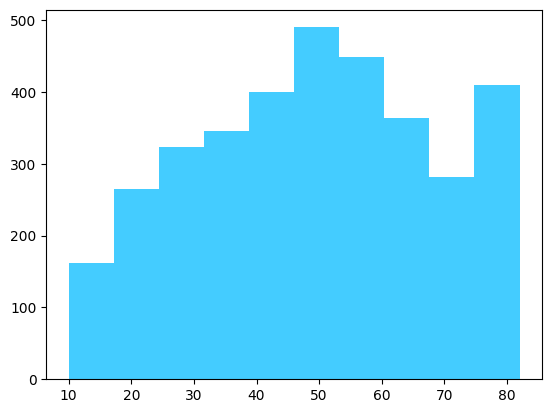

In [29]:
plt.hist(x = df['age'], color = '#44CCFF')
plt.show()

#### What's the relationship between age and average glucose level in a person?

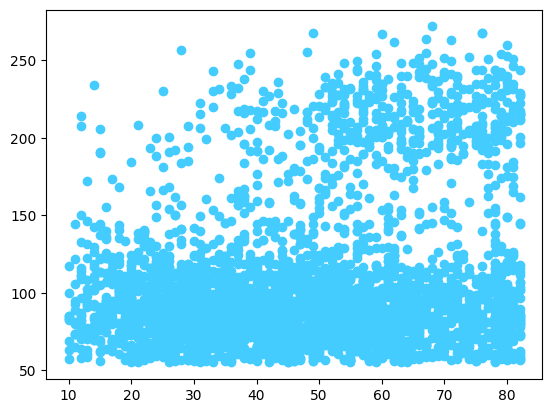

In [30]:
plt.scatter(df['age'], df['avg_glucose_level'], color = '#44CCFF')
plt.show()

#### Feature Correlation

Multicollinearity Check

In [31]:
x = df.loc[:, ['age', 'hypertension','heart_disease','avg_glucose_level', 'bmi']]
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF2"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF2
0,age,7.967873
1,hypertension,1.225353
2,heart_disease,1.156494
3,avg_glucose_level,6.399790
4,bmi,9.275085


* VIF stands for Variance Inflation Factor, which is a statistical measure used in machine learning to quantify multicollinearity among predictor variables in a regression analysis.

* VIF measures the degree to which the variance (or estimated standard error) of the coefficient estimate for a particular independent variable is increased due to multicollinearity with the other independent variables. VIF values range from 1 upwards, with values greater than 1 indicating the presence of multicollinearity. A commonly used threshold for VIF is 5 or 10, meaning that any predictor with a VIF greater than 5 or 10 should be further investigated for multicollinearity and potentially removed from the model.

### Data Preparation

#### Encode Categorical

In [32]:
encd_df = df.apply(LabelEncoder().fit_transform)

* This code applies a LabelEncoder transformation to each column in a Pandas DataFrame called df, and creates a new DataFrame called encd_df with the transformed data.

* LabelEncoder is a class from the scikit-learn library that is used to encode categorical variables as integer values. It works by assigning a unique integer code to each unique category in the variable, with the codes ranging from 0 to n-1, where n is the number of unique categories. This encoding can be useful when working with machine learning models that require numerical input data, as it allows the model to treat categorical variables as numeric variables.

In [33]:
encd_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,stroke,is_paralyzed,avg_glucose_level,bmi
0,1,34,0,1,1,2,1,0,1,1,2821,204
1,1,71,0,1,1,2,0,1,1,1,1853,163
2,0,34,0,0,1,2,1,2,1,1,2454,182
3,0,70,1,0,1,3,0,1,1,1,2462,78
4,1,34,0,0,1,2,1,0,1,1,2502,128


#### Data Imbalance Check

In [34]:
# Check the class counts
encd_df.stroke.value_counts()

stroke
0    3280
1     209
Name: count, dtype: int64

In [35]:
oversample = SMOTE(random_state = 2, sampling_strategy='auto')
xo = encd_df.loc[:, encd_df.columns != 'stroke']
yo = encd_df.loc[:, 'stroke']
x = xo.values
y = yo.values
x, y = oversample.fit_resample(x, y)
x = pd.DataFrame(x, columns = xo.columns)
y = pd.DataFrame(y, columns=['stroke'])
sm_df = pd.concat([x, y], axis = 1)

In [36]:
sm_df.stroke.value_counts()

stroke
1    3280
0    3280
Name: count, dtype: int64

* The code performs oversampling using the SMOTE (Synthetic Minority Over-sampling Technique) algorithm to address class imbalance in the encd_df Pandas DataFrame. 

* SMOTE is a popular algorithm for addressing class imbalance in datasets. It generates synthetic minority class examples by interpolating new samples along the line segments that join a minority class example to its nearest neighbors in feature space.

In [37]:
encd_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'smoking_status', 'stroke',
       'is_paralyzed', 'avg_glucose_level', 'bmi'],
      dtype='object')

In [38]:
sm_df.to_csv('brain_stroke_processed_v2.csv', index = False)

In [39]:
sm_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'smoking_status', 'is_paralyzed',
       'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')

In [41]:
sm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             6560 non-null   int64
 1   age                6560 non-null   int64
 2   hypertension       6560 non-null   int64
 3   heart_disease      6560 non-null   int64
 4   ever_married       6560 non-null   int64
 5   work_type          6560 non-null   int64
 6   residence_type     6560 non-null   int64
 7   smoking_status     6560 non-null   int64
 8   is_paralyzed       6560 non-null   int64
 9   avg_glucose_level  6560 non-null   int64
 10  bmi                6560 non-null   int64
 11  stroke             6560 non-null   int64
dtypes: int64(12)
memory usage: 615.1 KB


*The above code saves the preprocessed data in sm_df dataframe as a CSV file named brain_stroke_processed_v2.csv in the current working directory*

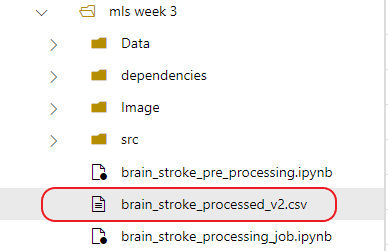

In [41]:
from IPython import display
display.Image("Image/Image10.png")

#### Process Numeric

In [42]:
sc = StandardScaler()
sm_df[['age', 'avg_glucose_level','bmi']] = sc.fit_transform(sm_df[['age', 'avg_glucose_level','bmi']])
sm_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,is_paralyzed,avg_glucose_level,bmi,stroke
0,1,-0.792338,0,1,1,2,1,0,1,1.411132,1.173573,1
1,1,1.240561,0,1,1,2,0,1,1,0.318649,0.441841,1
2,0,-0.792338,0,0,1,2,1,2,1,0.996936,0.780936,1
3,0,1.185617,1,0,1,3,0,1,1,1.005965,-1.075163,1
4,1,-0.792338,0,0,1,2,1,0,1,1.051109,-0.182808,1


* The code standardizes the numeric columns in the sm_df Pandas DataFrame using the StandardScaler class from the sklearn.preprocessing module. Standardization (or z-score normalization) is a common preprocessing step in machine learning that scales each feature to have zero mean and unit variance.

* First, the StandardScaler object sc is created. Then, the fit_transform() method is called on the subset of sm_df containing the columns 'age', 'avg_glucose_level', and 'bmi'. This scales the values of these columns to have zero mean and unit variance.

* Finally, the standardized values are assigned back to the original columns in sm_df using the same column names. The head() method is called to display the first few rows of the resulting DataFrame.

#### Handle Outliers

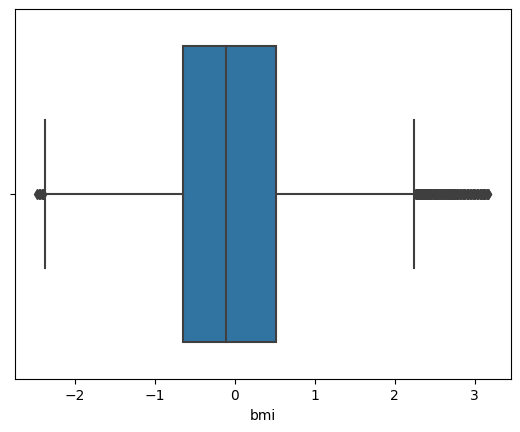

In [43]:
sns.boxplot(x = sm_df['bmi'])
plt.show()

In [44]:
upper_limit = sm_df['bmi'].mean() + (2*sm_df['bmi'].std())
lower_limit = sm_df['bmi'].mean() - (2*sm_df['bmi'].std())

In [45]:
sm_df = sm_df[(sm_df['bmi'] <= upper_limit) & (sm_df['bmi'] >= lower_limit)]

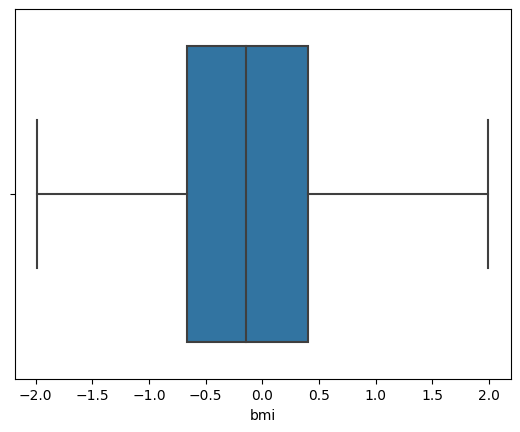

In [46]:
sns.boxplot(x = sm_df['bmi'])
plt.show()

#### Split data

In [47]:
x = sm_df.loc[:, sm_df.columns != 'stroke']
y = sm_df.loc[:, 'stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

* The code splits the preprocessed and balanced dataset sm_df into training and testing sets using the train_test_split() function from the sklearn.model_selection module.

* First, x is defined as a subset of sm_df containing all columns except the target variable 'stroke'. y is defined as the 'stroke' column.

* Then, train_test_split() is called with the following parameters:

* x: the predictor variables (features)
* y: the target variable
* test_size: the proportion of the dataset to include in the test split (in this case, 30%)
* random_state: the seed used by the random number generator for reproducibility

The function returns four arrays:

* x_train: the subset of x used for training the model
* x_test: the subset of x used for testing the model
* y_train: the subset of y used for training the model
* y_test: the subset of y used for testing the model

### Exporting the data

*First, save the x_train, x_test, y_train, y_test dataframes as CSV files in the local directory using the to_csv() function*

In [48]:
#Exporting to local 

x_train.to_csv('Data/x_train.csv', index=False)
x_test.to_csv('Data/x_test.csv', index=False)
y_train.to_csv('Data/y_train.csv', index=False)
y_test.to_csv('Data/y_test.csv', index=False)

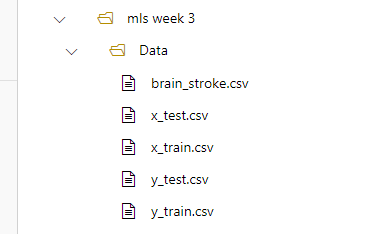

In [53]:
from IPython import display
display.Image("Image/Image11.png")

*Uploading the train-test split data to datastores*

In [50]:
import azureml.core
from azureml.core import Workspace,Dataset

# Load the workspace from the saved config file
ws = Workspace.from_config()
# Get the default datastore
default_ds = ws.get_default_datastore()

In [54]:
# Upload the x_train.csv file to the data store
default_ds.upload_files(files=['Data/x_train.csv'], target_path='data_process/data', overwrite=True)
default_ds.upload_files(files=['Data/x_test.csv'], target_path='data_process/data', overwrite=True)
default_ds.upload_files(files=['Data/y_train.csv'], target_path='data_process/data', overwrite=True)
default_ds.upload_files(files=['Data/y_test.csv'], target_path='data_process/data', overwrite=True)

Uploading an estimated of 1 files
Uploading Data/x_train.csv
Uploaded Data/x_train.csv, 1 files out of an estimated total of 1
Uploaded 1 files
Uploading an estimated of 1 files
Uploading Data/x_test.csv
Uploaded Data/x_test.csv, 1 files out of an estimated total of 1
Uploaded 1 files
Uploading an estimated of 1 files
Uploading Data/y_train.csv
Uploaded Data/y_train.csv, 1 files out of an estimated total of 1
Uploaded 1 files
Uploading an estimated of 1 files
Uploading Data/y_test.csv
Uploaded Data/y_test.csv, 1 files out of an estimated total of 1
Uploaded 1 files


$AZUREML_DATAREFERENCE_eab6c9d042864ff88cefc9d71ba34ca5

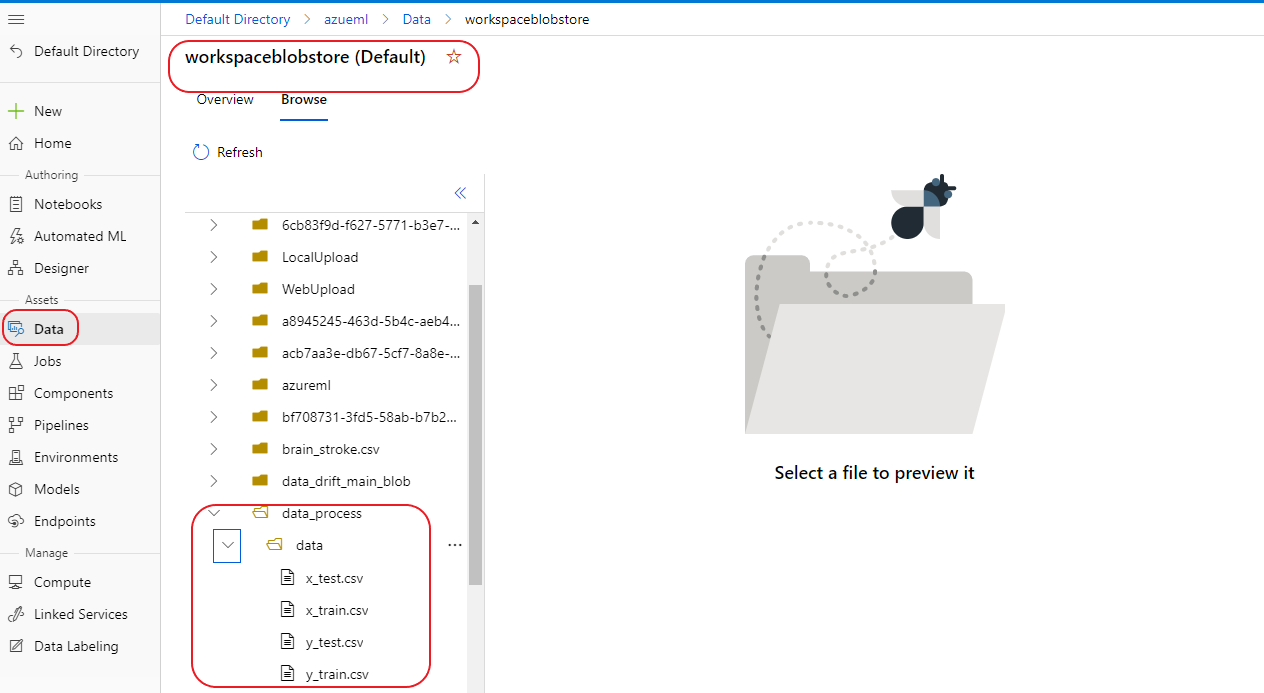

In [55]:
from IPython import display
display.Image("Image/Image12.png")